# Classifier for Political Ideology using GSS Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [7]:

# Political Ideology Classifier Using GSS Data


## Step 2: Load Data
df = pd.read_excel("result-2/GSS.xlsx", sheet_name="Data")

## Step 3: Filter Valid Rows
# Keep only rows where all required values are present
df = df[['year', 'polviews', 'grass', 'abany']]
df = df.dropna()
df = df[~df.apply(lambda row: row.astype(str).str.contains(":").any(), axis=1)]

print(df.head())

   year                      polviews            grass abany
0  2014                  Conservative  Should be legal   YES
1  2014         Slightly conservative  Should be legal    NO
4  2014  Moderate, middle of the road  Should be legal    NO
8  2014  Moderate, middle of the road  Should be legal    NO
9  2014              Slightly liberal  Should be legal   YES


In [ ]:

## Step 4: Encode Categorical Variables
# Simplify polviews to 3 categories
def simplify_polviews(val):
    if "liberal" in val.lower():
        return "liberal"
    elif "conservative" in val.lower():
        return "conservative"
    elif "moderate" in val.lower():
        return "moderate"
    else:
        return None

df['polviews_simplified'] = df['polviews'].apply(simplify_polviews)
df = df[df['polviews_simplified'].notnull()]


   year                      polviews            grass abany
0  2014                  Conservative  Should be legal   YES
1  2014         Slightly conservative  Should be legal    NO
4  2014  Moderate, middle of the road  Should be legal    NO
8  2014  Moderate, middle of the road  Should be legal    NO
9  2014              Slightly liberal  Should be legal   YES
Accuracy: 0.4744094488188976

Classification Report:
               precision    recall  f1-score   support

conservative       0.53      0.37      0.43       175
     liberal       0.48      0.61      0.54       145
    moderate       0.44      0.47      0.45       188

    accuracy                           0.47       508
   macro avg       0.48      0.48      0.47       508
weighted avg       0.48      0.47      0.47       508



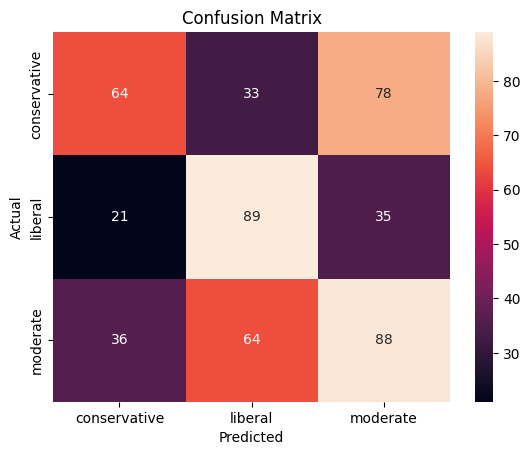

In [6]:

# Encode other categorical responses
df['grass_encoded'] = df['grass'].map({
    "Should be legal": 1,
    "Should not be legal": 0
})

df['abany_encoded'] = df['abany'].map({
    "YES": 1,
    "NO": 0
})

df = df.dropna(subset=['grass_encoded', 'abany_encoded'])

## Step 5: Prepare Data for Modeling
X = df[['grass_encoded', 'abany_encoded']]
y = df['polviews_simplified']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## Step 7: Train Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

## Step 8: Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

## Step 9: Visualize
sns.heatmap(pd.crosstab(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred)), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [2]:
pip install openpyxl


  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/c1/8b/5fe2cc11fee489817272089c4203e679c63b570a5aaeb18d852ae3cbba6a/et_xmlfile-2.0.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 7.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
